In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Shaheen Khanam\\13 nov new python batch'

In [5]:
data = pd.read_excel('data.xlsx')

#  Preliminary analysis:

Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.
Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.duplicated().sum()

1

remove the duplicate

In [9]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace =True)

Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

one duplicate row might be deleted

In [10]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.rename({'cp' :'chest_pain_type',
'trestbps':'resting_blood_pressure',
'chol':'cholesterol',
'fbs' :'fasting_blood_sugar',
'restecg':'resting_ecg',
'thalach' : 'max_heart_rate',
'exang':'exercise_induced_angina',
'oldpeak':'st_depression',
'slope':'st_slope',
'ca' : 'major_vessels',
'thal' :'thalessimia' },axis = 1, inplace = True)

In [12]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

# Performing EDA and Modeling:

Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

creating a list of categorical columns for explicit understanding

In [13]:
cat =['sex', 'chest_pain_type', 'fasting_blood_sugar', 'excercise_induced_angina','st_slope','thalessimia']

In [14]:
#Statistical Description

In [15]:
data.loc[:, ~data.columns.isin(cat)].describe()

,age,resting_blood_pressure,cholesterol,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,major_vessels,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.526490,149.569536,0.327815,1.043046,0.718543,0.543046
std,9.04797,17.563394,51.753489,0.526027,22.903527,0.470196,1.161452,1.006748,0.498970
min,29.00000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,1.000000,152.500000,0.000000,0.800000,0.000000,1.000000
75%,61.00000,140.000000,274.750000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.00000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,4.000000,1.000000


In [16]:
 data.thalessimia.value_counts()

2    165
3    117
1     18
0      2
Name: thalessimia, dtype: int64

In [17]:
data.loc[data.thalessimia==0 , 'thalessimia'] = 2

Note :
• thalessimia has 4 unique categories according to data however in description there are only 3
• there are 2 records which are identified as 0 ; these can be seen as missing values and hence
need to be imputed.
• for imputation we can put in the category with modal value of 2

converting the numeric categories for each column to relevent descriptors

In [18]:
data.loc[data.sex == 0 , 'sex'] = 'female'
data.loc[data.sex == 1, 'sex'] = 'male'
data.loc[data.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
data.loc[data.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
data.loc[data.chest_pain_type == 2,'chest_pain_type'] = 'non-anginal pain'
data.loc[data.chest_pain_type == 3,'chest_pain_type'] = 'asymptomatic'
data.loc[data.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
data.loc[data.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'
data.loc[data.resting_ecg == 0, 'resting_ecg'] = 'normal'
data.loc[data.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
data.loc[data.resting_ecg == 2 , 'resting_ecg'] = 'hyper'
data.loc[data.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
data.loc[data.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'
data.loc[data.st_slope == 0, 'st_slope'] = 'upsloping'
data.loc[data.st_slope == 1, 'st_slope'] = 'flat'
data.loc[data.st_slope == 2, 'st_slope'] = 'downsloping'
data.loc[data.thalessimia == 1,'thalessimia'] = 'normal'
data.loc[data.thalessimia == 2,'thalessimia'] = 'fixed defect'
data.loc[data.thalessimia == 3,'thalessimia'] = 'reversable defect'
#data.loc[data.target == 0, 'target']= 'Disease -'
#data.loc[data.target == 1, 'target']= 'Disease +'


In [19]:
dsprsnt = data[data.target == 1].copy()
dsabsnt = data[data.target == 0].copy()

Target Distribution

In [20]:
vc= data.target.value_counts()
vc

1    164
0    138
Name: target, dtype: int64

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


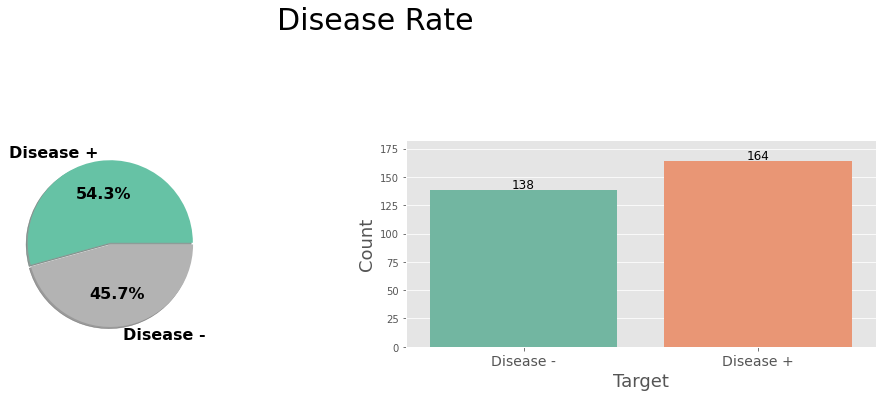

In [21]:
f,axes = plt.subplots(1,2, figsize = (15,6))
# plot no. 1
vc.plot.pie(ax = axes[0], radius = 1, cmap = 'Set2' , explode = [0.01,0.01],
shadow = True, autopct = '%1.1f%%',
textprops = {'family': 'times','color': 'black','weight':
'bold','size': 16}, labels = ['Disease +','Disease -'])
axes[0].set_ylabel('')
# plot no. 2
sns.countplot(data.target,ax = axes[1],palette= 'Set2')
for i in range(len(vc)):
    axes[1].annotate(vc[i], (i-0.05,vc[i]+2), fontsize = 12)
    axes[1].set_ylim(0,axes[1].set_ylim()[1]+5)
    axes[1].set_xlabel('Target',fontsize = 18, family = 'times')
    axes[1].set_ylabel('Count',fontsize = 18, family = 'times')
    axes[1].set_xticklabels( ['Disease -','Disease +'], fontsize = 14, family =
'times')
f.suptitle('Disease Rate\n', fontsize = 30, family = 'times')
plt.tight_layout(pad = 4)
plt.show()

Study the occurrence of CVD across Age.

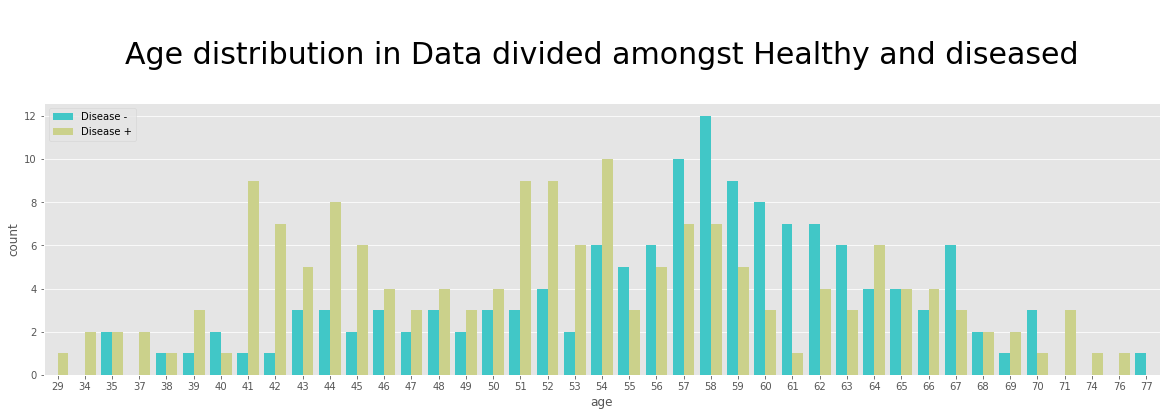

In [22]:
plt.figure(figsize = (20,5))
sns.countplot(data.age, hue = data.target, palette='rainbow')
plt.legend(['Disease -','Disease +'], loc = 'upper left')
plt.title('\nAge distribution in Data divided amongst Healthy and diseased\n',
fontsize = 30)
plt.show()

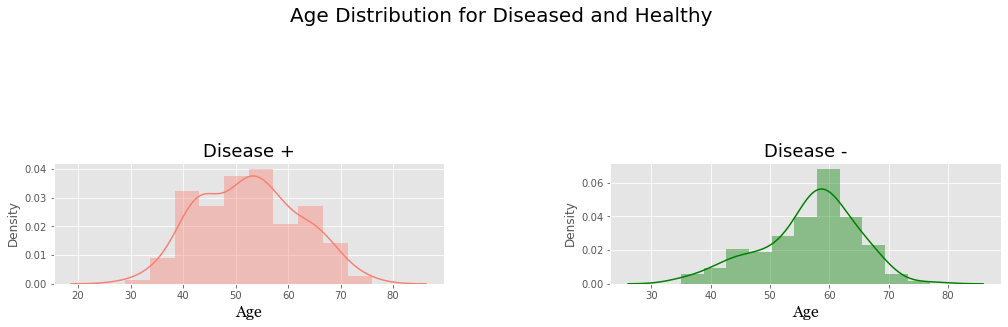

In [23]:
f,axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(dsprsnt.age,ax = axes[0], color = 'salmon')
sns.distplot(dsabsnt.age, ax = axes[1], color = 'green')
axes[0].set_title('Disease +',fontdict = {'family': 'times','size': 18})
axes[1].set_title('Disease -',fontdict = {'family': 'times','size': 18})
axes[0].set_xlabel('Age', fontdict = {'family': 'georgia','color':
'black','weight': 'normal','size': 16})
axes[1].set_xlabel('Age',fontdict = {'family': 'georgia','color':
'black','weight': 'normal','size': 16})
f.suptitle('Age Distribution for Diseased and Healthy\n\n ',fontsize= 20)
plt.tight_layout(w_pad= 12, pad = 4 )
plt.show()


findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


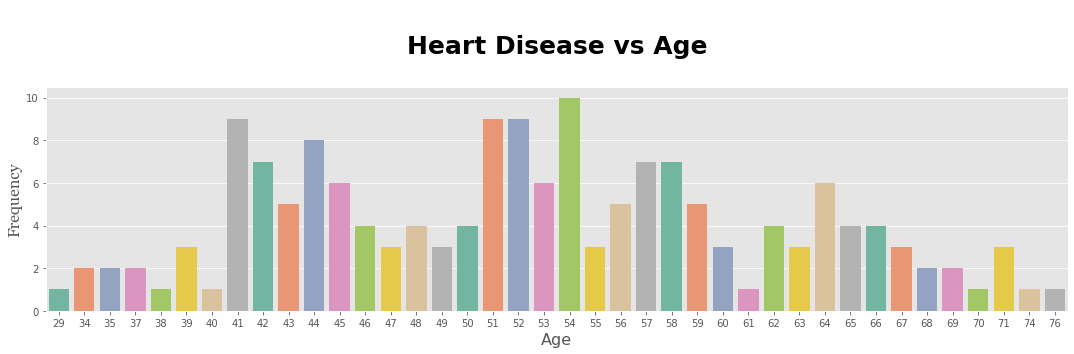

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(dsprsnt.age, palette='Set2')
plt.title('\nHeart Disease vs Age\n', family='times', weight='bold', fontsize=25)
plt.tight_layout()
plt.xlabel('Age', family='times', fontsize=16)
plt.ylabel('Frequency', family='georgia',fontsize=16)
plt.show()

the chances of heart attack across age has intermittent peaks
tendency of disease increases after 40
 the age groups 41 - 45 and 51 - 54 have the highest chances of heart attack

In [29]:
def cat_plot(var):
    f,axes = plt.subplots(1,2, figsize = (18,5))
vc = data[var].value_counts()
nouniq = data[var].nunique()


NameError: name 'var' is not defined

 Resting blood pressure for male and female vs target


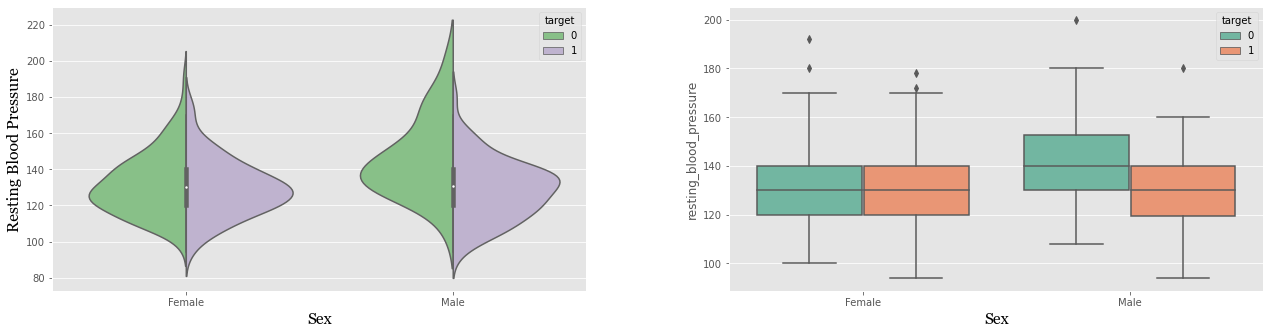

In [26]:
f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'resting_blood_pressure', x = 'sex',hue = 'target',data =
data, split = True, palette= 'Accent', ax = axes[0])
axes[0].set_xlabel('Sex', fontdict = {'family': 'georgia','color':
'black','weight': 'normal','size': 16})
axes[0].set_ylabel('Resting Blood Pressure', fontdict = {'family':
'georgia','color': 'black','weight': 'normal','size': 16})
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = data.sex, y = data.resting_blood_pressure, hue = data.target,
ax = axes[1], palette='Set2')
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex',fontdict = {'family': 'georgia','color':
'black','weight': 'normal','size': 16})
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()

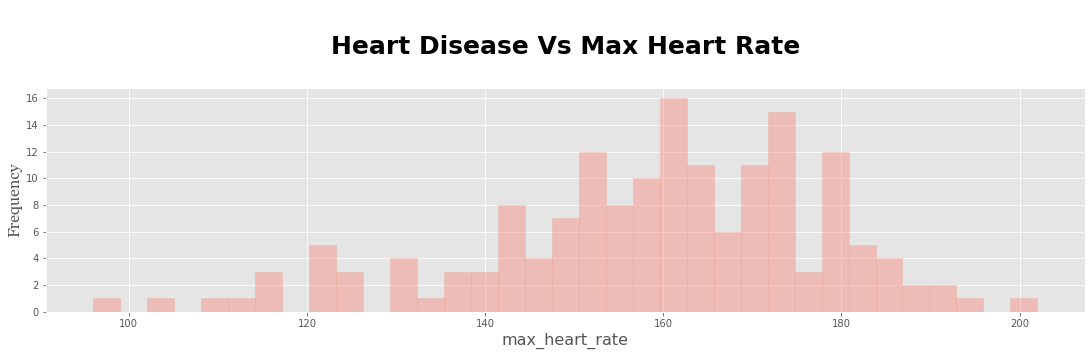

In [35]:
#real_distribution('max_heart_rate')
plt.figure(figsize = (15,5))
sns.distplot(dsprsnt.max_heart_rate, kde = False, bins = 35, hist_kws ={'edgecolor':'darksalmon', 'color' :'salmon'})
plt.title('\nHeart Disease Vs Max Heart Rate\n',family='times', weight
='bold',fontsize= 25)
plt.tight_layout( )
plt.xlabel('max_heart_rate',family='times',fontsize= 16)
plt.ylabel('Frequency',family='georgia',fontsize= 16)
plt.show()

#major_vessels


In [36]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

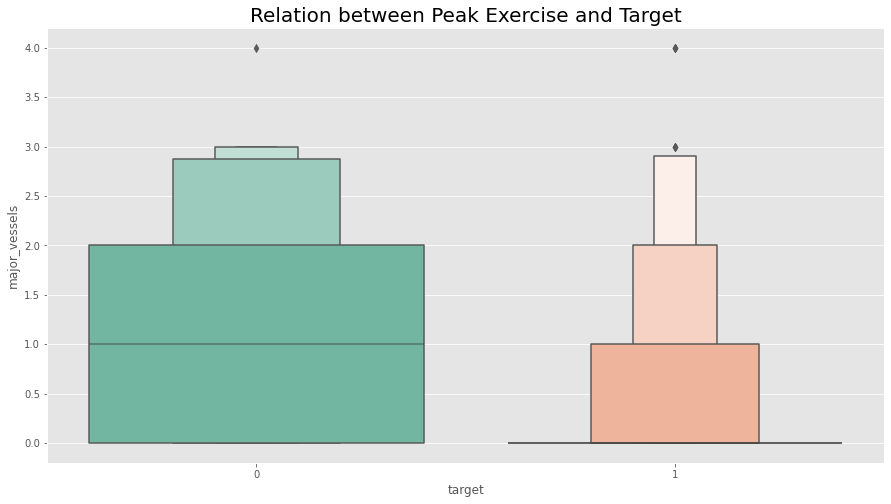

In [37]:
plt.figure(figsize= (15,8))
sns.boxenplot(data['target'], data['major_vessels'], palette = 'Set2')
plt.title('Relation between Peak Exercise and Target', fontsize = 20,fontweight = 30)
plt.show()

The above Bivariate plot between Target and Number of Major Vessels, shows that the patients
who are more likely to suffer from Heart diseases are having high values of Major Vessels wheras
the patiets who are very less likely to suffer from any kind of heart diseases have very low values
of Major Vessels.

Use a pair plot to understand the relationship between all the given variables.

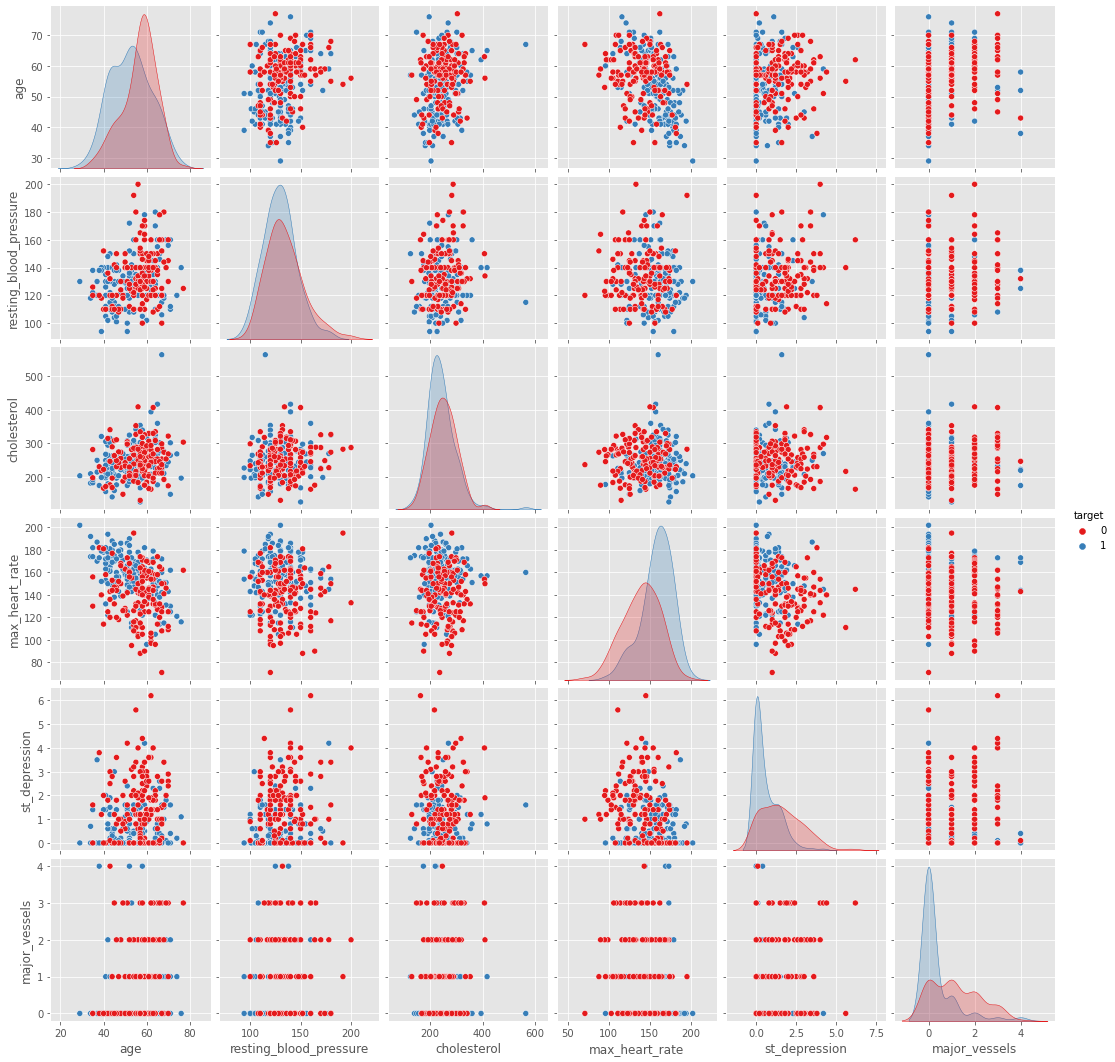

In [38]:
sns.pairplot(data, hue = 'target', palette='Set1')

 apply logistic Regression

In [39]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
data_dummy = pd.get_dummies(data)
data_dummy.columns = data_dummy.columns.str.replace(' ','_')
train, test = split(data_dummy, test_size = .30, random_state = 12)
train.shape
train.head(2)
X_train = train.drop('target', axis = 1)
Y_train = train.target
X_test = test.drop('target', axis = 1)
Y_test = test.target
lr = LogisticRegression()
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
accuracy_score(y_true = Y_test,y_pred = pred)
print(classification_report(y_true=Y_test,y_pred = pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        45
           1       0.88      0.80      0.84        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, pred))


[[40  5]
 [ 9 37]]
